In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = r"C:\Users\User\OneDrive\Programming books\Datasets\covid19_tweets.csv"
df = pd.read_csv(path)
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
df.shape

(179108, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


### Tasks
#### 1. Preprocessing
#### 2. Sentiment Analysis
#### 3. Keyword extraction
#### 4. Entity extraction

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


##### Source of tweets

In [7]:
df['source'].value_counts().head(20)

Twitter Web App         56891
Twitter for Android     40179
Twitter for iPhone      35472
TweetDeck                8543
Hootsuite Inc.           7321
Twitter for iPad         4336
Buffer                   2728
Sprout Social            1833
Instagram                1759
IFTTT                    1545
dlvr.it                   681
GlobalPandemic.NET        679
LinkedIn                  628
COVID19-Updates           625
Twitter Media Studio      596
WordPress.com             537
HubSpot                   513
Sprinklr                  497
FS Poster                 414
Dynamic Signal            391
Name: source, dtype: int64

<AxesSubplot:>

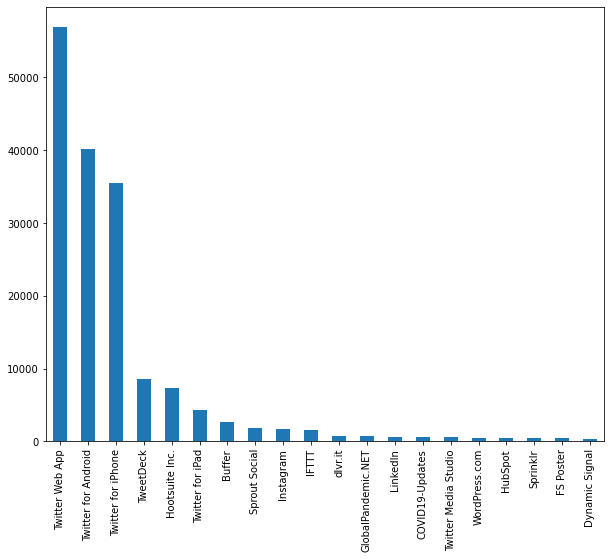

In [8]:
plt.figure(figsize = (10, 8))
df['source'].value_counts().head(20).plot(kind = 'bar')

##### Import neattext

In [9]:
#pip install neattext

In [10]:
import neattext.functions as nfx

##### neattext functions

In [11]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

1. Remove hashtags
2. User handles
3. Emojis
4. urls
5. Special char

In [12]:
df['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [13]:
df['Extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [14]:
df['Cleaned_tweets'] = df['text'].apply(nfx.remove_hashtags)

In [15]:
df[['text', 'Cleaned_tweets']]

,text,Cleaned_tweets
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


Remove Userhandles

In [16]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: nfx.remove_userhandles(x))

In [17]:
df[['text', 'Cleaned_tweets']]

,text,Cleaned_tweets
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challen...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a t...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


URLs

In [18]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: nfx.remove_urls(x))

Punctuation

In [19]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: nfx.remove_puncts(x))

Emojis

In [20]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: nfx.remove_emojis(x))

Special characters

In [21]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: nfx.remove_special_characters(x))

In [22]:
df['Cleaned_tweets'] = df['Cleaned_tweets'].apply(lambda x: nfx.remove_multiple_spaces(x))

In [23]:
df[['text', 'Cleaned_tweets']]

,text,Cleaned_tweets
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to hav...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challengeI no...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


### Sentiment Analysis

In [24]:
#pip install textblob

In [25]:
from textblob import TextBlob

In [26]:
def get_sentiments(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
        
    result = {'polarity': sentiment_polarity,
             'subjectivity': sentiment_subjectivity,
             'sentiment': sentiment_label}
    return result

In [27]:
get_sentiments(df['text'].iloc[0])

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [28]:
df['sentiment_result'] = df['Cleaned_tweets'].apply(get_sentiments)

In [29]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Extracted_hashtags,Cleaned_tweets,sentiment_result
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen..."
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to hav...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim..."
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571..."
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [30]:
pd.json_normalize(df['sentiment_result'])

,polarity,subjectivity,sentiment
0,-0.250000,0.250000,Negative
1,0.500000,0.500000,Positive
2,0.000000,0.000000,Neutral
3,0.000000,0.357143,Neutral
4,0.000000,0.000000,Neutral
...,...,...,...
179103,0.200000,0.200000,Positive
179104,0.800000,0.700000,Positive
179105,0.300000,1.000000,Positive
179106,0.263258,0.515152,Positive


In [31]:
df = df.join(pd.json_normalize(df['sentiment_result']))
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Extracted_hashtags,Cleaned_tweets,sentiment_result,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to hav...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


<AxesSubplot:>

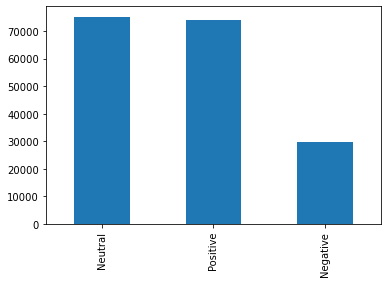

In [32]:
df['sentiment'].value_counts().plot(kind = 'bar')

In [33]:
df['sentiment'].value_counts()

Neutral     75210
Positive    74067
Negative    29831
Name: sentiment, dtype: int64

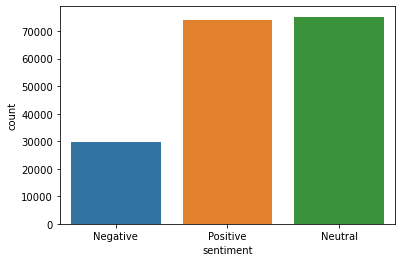

In [34]:
sns.countplot(df['sentiment'])
plt.show()

### Sentiment Extraction

In [35]:
positive_tweets = df[df['sentiment'] == 'Positive']['Cleaned_tweets']
negative_tweets = df[df['sentiment'] == 'Negative']['Cleaned_tweets']
neutral_tweets = df[df['sentiment'] == 'Neutral']['Cleaned_tweets']

What are stop words?

In [36]:
#Removing Stopwords
positive_tweets_list = positive_tweets.apply(nfx.remove_stopwords).to_list()
negative_tweets_list = negative_tweets.apply(nfx.remove_stopwords).to_list()
neutral_tweets_list = neutral_tweets.apply(nfx.remove_stopwords).to_list()

### Tokenization

In [59]:
positive_token = []
for tweet in positive_tweets_list:
    for token in tweet.split():
        positive_token.append(token)

In [60]:
negative_token = []
for tweet in negative_tweets_list:
    for token in tweet.split():
        negative_token.append(token)

In [61]:
neutral_token = []
for tweet in neutral_tweets_list:
    for token in tweet.split():
        neutral_token.append(token)

In [62]:
from collections import Counter

In [63]:
len(positive_token)

626964

In [ ]:
def get_tokens(docs, num = 30):
    
    

In [ ]:
#Word cloud
def plot 